### Imports

In [1]:
from mlp import train, Dense, predict_with_layer_value, train_with_max_error, predict
from activation_functions import Sigmoid
from mse import mse, mse_derivative
from utils import fonts_to_bitmap, bitmap_as_matrix, get_config_params, train_different_architectures
from plots import *
from data.font import fontDict
import numpy as np
import matplotlib.pyplot as plt

### Config params

In [2]:
learning_rate, max_epochs, bias, beta1, beta2, epsilon, optimizer, activation = get_config_params('./linear_ae.json')

mse_list = []

In [3]:
bitmapDict = fonts_to_bitmap(fontDict)
bitmapList = list(bitmapDict.values())  
X = np.reshape(bitmapList,(len(bitmapList), 35, 1))

### Error across epochs

In [4]:
# mse_list = train_different_architectures(optimizer, learning_rate, max_epochs, X)

# ARQUITECTURES_LABELS = ["35-20-10-2-10-20-35", "35-15-5-2-5-15-35","35-15-2-15-35", "35-10-2-10-35"]

# colors = ['blue','red', 'green', 'orange']

# for i, mse_values in enumerate(mse_list):
#     plt.plot(range(1, len(mse_values) + 1), mse_values, color=colors[i], label=f"{ARQUITECTURES_LABELS[i]}")

# plt.title('MSE across epochs for different arquitectures')
# plt.xlabel('Epochs')
# plt.ylabel('Error (MSE)')
# plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))  
# plt.show()

### 35-20-10-2-10-20-35

In [5]:
# El espacio latente es la salida de la "capa 6"
def generate_autoencoder():
    return [
        Dense(35, 20, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(10, 2, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(20, 35, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
    ]

#error, epochs = train_with_max_error(autoencoder, mse, mse_derivative, X, X, max_error=0.02, verbose=True)

### Original vs Predicted

In [6]:
def is_same_pixel(pixel1, pixel2):
    return round(pixel1) == round(pixel2)

def compare_bitmaps(input_bitmap, output_bitmap, character, max_wrongs = 1):
    wrongs = 0  
    for i in range(7*5):
        if not is_same_pixel(input_bitmap[i], output_bitmap[i]):
            print(f"Pixel {i} of '{character}' is different: {input_bitmap[i]} != {output_bitmap[i]}")
            wrongs += 1
            if wrongs > max_wrongs:
                return False
    
    return True

['`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', 'DEL']
Se entrenaron 15000 epochs. Error: 0.018764209597930855
Pixel 23 of 'b' is different: 1 != 7.436739453777868e-28
Pixel 32 of 'b' is different: 1 != 2.5016975357081522e-12
Error en la reconstruccion del caracter 'b'
Pixel 16 of 'd' is different: 0 != 1.0
Pixel 15 of 'f' is different: 1 != 2.6645844678980718e-27
Pixel 32 of 'f' is different: 0 != 1.0
Error en la reconstruccion del caracter 'f'
Pixel 3 of 'j' is different: 1 != 3.721513005292765e-12
Pixel 6 of 'p' is different: 1 != 4.862709213311758e-35
Pixel 32 of 'q' is different: 0 != 1.0
Pixel 12 of 'r' is different: 1 != 3.029408585216665e-06
Pixel 30 of 's' is different: 1 != 6.36847601999396e-14
Pixel 1 of 't' is different: 1 != 4.972558141515487e-10
Pixel 25 of 'v' is different: 0 != 0.9999999738772021
Pixel 28 of 'x' is different: 1 != 2.2038087706637875e-08
Pixel 34 o

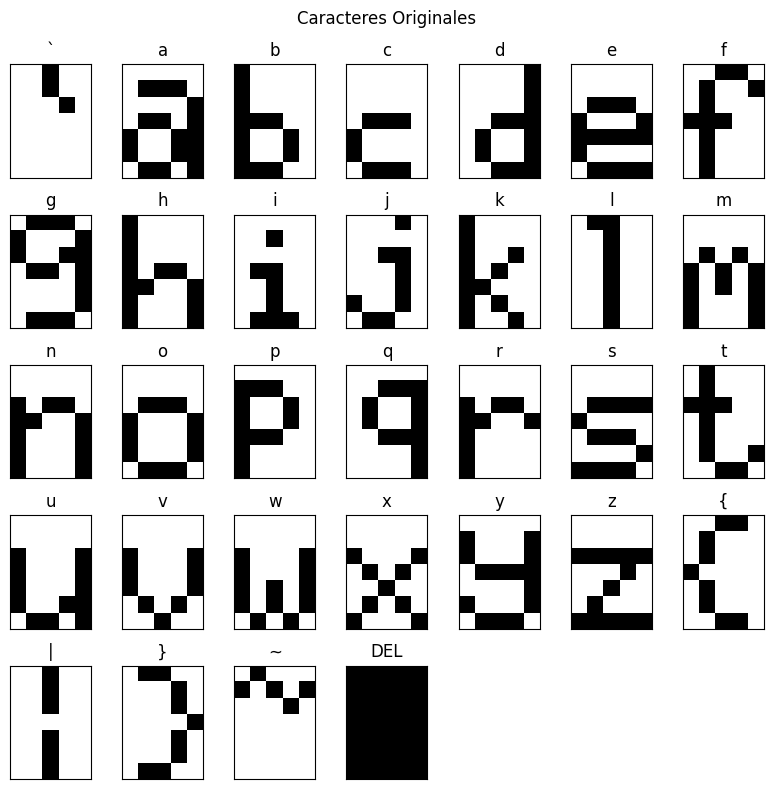

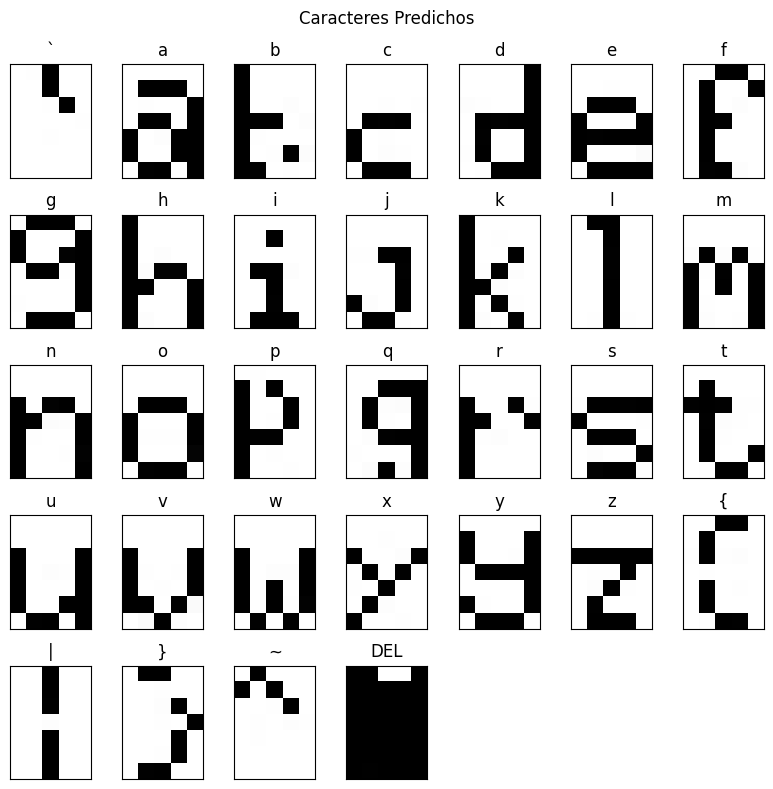

In [14]:
characters = list(bitmapDict.keys())
print(characters)

#epochs = 5000
#max_error = 0.02

#print(f"Entrenando con error maximo permitido de {max_error}")
autoencoder = generate_autoencoder()
error = train(autoencoder, mse, mse_derivative, X, X, epochs=15000, verbose=False)
print(f"Se entrenaron {15000} epochs. Error: {error[-1]}")

latent_spaces = []
raw_latent_spaces = []
input_matrix_list = []
output_matrix_list = []
correct = 0
for c in range(len(characters)):
    input_bitmap = []
    output_bitmap = []

    # X es una lista de listas de -listas con un solo elemento-
    for i in range(len(X[c])):
        input_bitmap.append(X[c][i][0])
    input_matrix_list.append(bitmap_as_matrix(input_bitmap))

    # El espacio latente es la salida de la "capa 8"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder, X[c], 6)
    raw_latent_spaces.append(raw_latent_space)
    latent_spaces.append((raw_latent_space[0][0], raw_latent_space[1][0]))

    for output in outputs:
        output_bitmap.append(output[0])

    if not compare_bitmaps(input_bitmap, output_bitmap, characters[c]):
        print(f"Error en la reconstruccion del caracter '{characters[c]}'")
        # break
    else:
        correct += 1
    
    output_matrix_list.append(bitmap_as_matrix(output_bitmap))

# if(correct == len(characters)):
#     break

#epochs += 1000 # Entreno 200 epochs mas
#max_error *= 0.9 # Reduzco el error maximo permitido un 10%

plot_bitmap_matrix_2(input_matrix_list, characters, "Caracteres Originales")
plot_bitmap_matrix_2(output_matrix_list, characters, "Caracteres Predichos")
    

### Latent Space

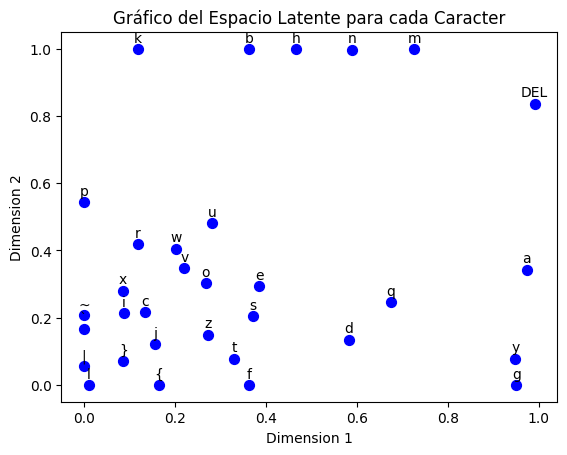

In [34]:
plot_latent_spaces(latent_spaces, characters)

### Caracteres Nuevos

#### Entrenamiento

In [35]:
decoder = autoencoder[6:]
print(raw_latent_space)

[[0.99104917]
 [0.83693576]]


#### Generacion

In [10]:
# for _ in range(15):

#         n = 10
#         digit_size = INPUT_ROWS
#         images = np.zeros((INPUT_ROWS, INPUT_COLS * n))

#         random_index1 = np.random.choice(emoji_indexes)
#         input_reshaped1 = np.reshape(emoji_images[random_index1], (len(emoji_images[random_index1]), 1))
#         vae.feedforward(input_reshaped1)
#         img1 = vae.sampler.sample

#         random_index2 = np.random.choice(emoji_indexes)
#         while random_index1 == random_index2:
#             random_index2 = np.random.choice(emoji_indexes)
#         input_reshaped2 = np.reshape(emoji_images[random_index2], (len(emoji_images[random_index2]), 1))
#         vae.feedforward(input_reshaped2)
#         img2 = vae.sampler.sample

#         for i in range(n):
#             z = (img1 * (n - 1 - i) + img2 * i) / (n - 1)
#             output = vae.decoder.feedforward(z)
#             output = output.reshape(INPUT_ROWS, INPUT_COLS)
#             images[:, i * INPUT_COLS:(i + 1) * INPUT_COLS] = output

#         plt.figure(figsize=(10, 10))
#         plt.title(f"From \"{emoji_names[random_index1]}\" "
#                   f"to \"{emoji_names[random_index2]}\"")
#         plt.imshow(images, cmap='gray')
#         plt.xticks([])
#         plt.yticks([])
#         plt.show()

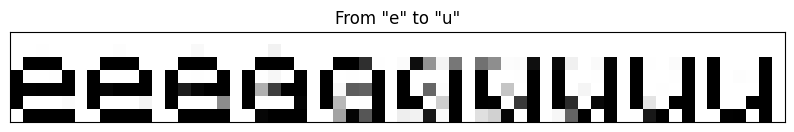

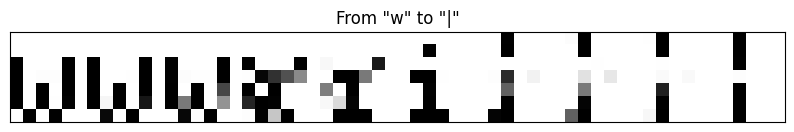

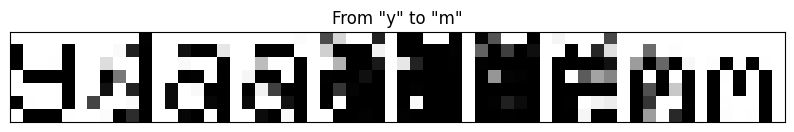

In [33]:

INPUT_ROWS = 7
INPUT_COLS = 5

from_indexes = [5, 23, 25] # e
to_indexes = [21, 28, 13] # u

new_latent_spaces = []
n = 10
for c in range(len(from_indexes)):
    images = np.zeros((INPUT_ROWS, INPUT_COLS * n + n))

#     from_index = np.random.randint(0, len(raw_latent_spaces))
#     to_index = np.random.randint(0, len(raw_latent_spaces))

    from_value = raw_latent_spaces[from_indexes[c]]
    to_value = raw_latent_spaces[to_indexes[c]]

    zero_columns = 0
    for i in range(n):
            z = (from_value * (n - 1 - i) + to_value * i) / (n - 1)
            output = predict(decoder, z)
            output = output.reshape(INPUT_ROWS, INPUT_COLS)
            images[:, i * INPUT_COLS + zero_columns:(i + 1) * INPUT_COLS + zero_columns] = output
            images[:, (i + 1) * INPUT_COLS + zero_columns] = np.zeros(INPUT_ROWS)
            zero_columns += 1	



    # for output in outputs:
    #     output_bitmap.append(output[0])
    
    # output_bitmap_matrix = bitmap_as_matrix(output_bitmap)

    
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(wspace=10)
    plt.title(f"From \"{characters[from_indexes[c]]}\" "
                f"to \"{characters[to_indexes[c]]}\"")
    plt.imshow(images, cmap='binary', interpolation='none', vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.show()

    